# 다중선형회귀분석

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [2]:
df_raw = pd.read_csv('add_variable_customer.csv', encoding='euc-kr')
df_raw

,Unnamed: 0,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,0,C-10001,여성,37,30,Yes,No,0,Yes,2,...,3,0,47910,431100,21,83590.476190,1755400,2186500,20528,0
1,1,C-10002,남성,46,40,No,No,0,No,0,...,5,11300,12090,108710,21,68928.571429,1447500,1567510,5176,538
2,2,C-10003,남성,50,50,No,No,0,No,0,...,1,0,38080,152100,4,98180.000000,490900,643000,38025,0
3,3,C-10004,남성,78,70,Yes,No,0,Yes,1,...,1,0,31410,408720,13,112742.857143,1578400,1987120,31440,0
4,4,C-10005,여성,75,70,Yes,No,0,Yes,3,...,1,0,8360,24970,3,94500.000000,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6858,C-17039,여성,20,20,No,No,0,No,0,...,4,0,52770,685680,25,64428.000000,1610700,2296380,27427,0
6859,6859,C-17040,남성,40,40,Yes,No,0,Yes,1,...,1,0,18310,402730,22,101891.304348,2343500,2746230,18305,0
6860,6860,C-17041,남성,22,20,No,No,0,No,0,...,5,0,21020,42040,14,56600.000000,792400,834440,3002,0
6861,6861,C-17042,남성,21,20,No,No,0,Yes,5,...,3,0,2370,160460,79,80107.594937,6328500,6488960,2031,0


In [3]:
df_raw.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

In [5]:
df_raw['StartDate'] = pd.to_datetime(df_raw['StartDate'])
df_raw = df_raw[(df_raw["StartDate"].dt.year>=2020)]

In [6]:
df_raw.drop(['CustomerId', 'StartDate', 'EndDate', 'ChurnLabel',
             'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=True)

/var/folders/_0/hhcfgww90217hcgb7pdwcnhm0000gn/T/ipykernel_5041/2268371761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(['CustomerId', 'StartDate', 'EndDate', 'ChurnLabel',


## 데이터 분할

In [7]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop('ChurnScore', axis=1, inplace=False)
df_raw_y = df_raw['ChurnScore']

In [8]:
# 변수명 저장
v_feature_names = df_raw_x.columns
# StandardScaler 적용
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,PaymentMethod,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,1.0,0.283333,0.166667,1.0,0.0,0.0,1.0,0.2,1.0,0.5,...,0.5,0.000000,0.847965,0.350807,0.869565,0.523660,0.573543,0.554732,0.364780,0.000000
1,0.0,0.433333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,1.0,0.066667,0.213982,0.088463,0.869565,0.401368,0.470452,0.394322,0.091977,0.005951
2,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.673982,0.123771,0.130435,0.645348,0.150166,0.154737,0.675700,0.000000
3,0.0,0.966667,0.833333,1.0,0.0,0.0,1.0,0.1,1.0,0.0,...,0.0,0.000000,0.555929,0.332596,0.521739,0.766815,0.514280,0.503063,0.558685,0.000000
4,1.0,0.916667,0.833333,1.0,0.0,0.0,1.0,0.3,1.0,0.5,...,0.0,0.000000,0.147965,0.020319,0.086957,0.614654,0.112365,0.092534,0.147899,0.000000


In [9]:
ss_df =pd.concat([df_raw_y, df_scaled], axis=1)
ss_df

,ChurnScore,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,65.0,1.0,0.283333,0.166667,1.0,0.0,0.0,1.0,0.2,1.0,...,0.50,0.000000,0.847965,0.350807,0.869565,0.523660,0.573543,0.554732,0.364780,0.000000
1,66.0,0.0,0.433333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.066667,0.213982,0.088463,0.869565,0.401368,0.470452,0.394322,0.091977,0.005951
2,71.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.000000,0.673982,0.123771,0.130435,0.645348,0.150166,0.154737,0.675700,0.000000
3,99.0,0.0,0.966667,0.833333,1.0,0.0,0.0,1.0,0.1,1.0,...,0.00,0.000000,0.555929,0.332596,0.521739,0.766815,0.514280,0.503063,0.558685,0.000000
4,68.0,1.0,0.916667,0.833333,1.0,0.0,0.0,1.0,0.3,1.0,...,0.00,0.000000,0.147965,0.020319,0.086957,0.614654,0.112365,0.092534,0.147899,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,NaN,0.0,0.883333,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.000000,0.200000,0.083124,0.347826,0.637091,0.311213,0.266443,0.201688,0.000000
2161,NaN,0.0,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.000000,0.990088,0.045521,0.521739,0.017708,0.085613,0.079854,0.076464,0.000000
2162,NaN,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.50,0.000000,0.730088,0.234848,0.782609,0.709783,0.659524,0.584353,0.269907,0.000000
2163,NaN,1.0,0.550000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.000000,0.841947,0.038710,0.000000,0.473277,0.037734,0.040627,0.845313,0.000000


In [12]:
# train/test 분리
ss_df_train, ss_df_test = train_test_split(ss_df, test_size = 0.3, random_state = 42) 
print("train data size : {}".format(ss_df_train.shape))
print("test data size : {}".format(ss_df_test.shape))

train data size : (2538, 27)
test data size : (1088, 27)


## 상관분석

In [11]:
df_corr = ss_df.corr()
df_corr

,SatisScore,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,CustomerLTV,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
SatisScore,1.000000,0.010831,-0.052624,-0.051265,0.044720,-0.018822,-0.008163,0.035491,-0.031012,-0.009590,...,-0.037378,-0.036925,-0.057601,-0.090216,-0.000712,-0.052392,-0.040983,-0.058222,-0.079275,0.001677
Gender,0.010831,1.000000,0.016251,0.020499,-0.008987,0.001708,0.004611,0.010660,-0.006208,-0.004120,...,0.039158,-0.003220,-0.004440,0.017867,-0.005009,0.032399,0.014348,0.016556,0.027910,-0.030787
Age,-0.052624,0.016251,1.000000,0.984797,0.110736,-0.051580,-0.022065,0.004298,-0.037208,0.116126,...,0.026293,0.049568,-0.020785,0.047211,-0.091549,0.182049,0.063474,0.067202,0.092494,0.049535
AgeGroup,-0.051265,0.020499,0.984797,1.000000,0.096443,-0.054304,-0.025566,0.000348,-0.039072,0.107862,...,0.031469,0.053696,-0.019051,0.048174,-0.088309,0.180187,0.065233,0.069054,0.095033,0.054327
Married,0.044720,-0.008987,0.110736,0.096443,1.000000,0.357525,0.346417,0.882433,0.594395,0.031539,...,-0.004208,-0.038184,-0.007556,0.085732,0.082027,0.021350,0.068906,0.078875,0.003398,-0.021991
Dependents,-0.018822,0.001708,-0.051580,-0.054304,0.357525,1.000000,0.904876,0.311836,0.313295,-0.110904,...,0.018956,-0.023007,-0.002032,0.011424,0.184772,-0.193638,-0.009246,-0.005747,-0.115583,-0.034872
noDependents,-0.008163,0.004611,-0.022065,-0.025566,0.346417,0.904876,1.000000,0.299193,0.316192,-0.122546,...,0.033722,-0.022429,-0.003601,0.006963,0.162735,-0.185465,-0.021266,-0.017108,-0.104395,-0.032508
Referrals,0.035491,0.010660,0.004298,0.000348,0.882433,0.311836,0.299193,1.000000,0.698788,0.004149,...,-0.021016,-0.033957,-0.013969,0.093016,0.110818,0.015484,0.086992,0.096246,-0.008103,-0.022014
noReferrals,-0.031012,-0.006208,-0.037208,-0.039072,0.594395,0.313295,0.316192,0.698788,1.000000,-0.060717,...,0.012769,-0.043573,0.010760,0.049298,0.223443,-0.085455,0.097502,0.094298,-0.103355,-0.042555
PaperlessBilling,-0.009590,-0.004120,0.116126,0.107862,0.031539,-0.110904,-0.122546,0.004149,-0.060717,1.000000,...,-0.010888,0.060726,0.019568,0.094265,-0.150069,0.398728,0.181165,0.179717,0.182924,0.055383


In [12]:
abs(df_corr['ChurnScore']).sort_values(ascending=False)

ChurnScore              1.000000
TenureMonths            0.570077
MonthRoamCharge         0.450034
AvgCharge               0.313564
UnlimitedData           0.207770
TotalCharge             0.202231
PaperlessBilling        0.196468
noReferrals             0.171012
Dependents              0.162218
TotalRevenue            0.154327
noDependents            0.150971
PaymentMethod           0.126489
Age                     0.120765
AgeGroup                0.120032
AvgExtraDataCharge      0.102086
AvgDownloadGB           0.094011
OnlineSecurity          0.073968
TotalRoamCharge         0.072770
OnlineBackup            0.043716
SatisScore              0.041287
TechSupport             0.039470
TotalExtraDataCharge    0.035101
AvgRoamCharge           0.034934
Gender                  0.032803
Referrals               0.023005
CustomerLTV             0.010792
Married                 0.000170
Name: ChurnScore, dtype: float64

In [11]:
reg_ss_model = smf.ols(formula = "ChurnScore ~ Age + AgeGroup " , data = ss_df_train)

# 적합
reg_ss_result = reg_ss_model.fit()
print(reg_ss_result.summary())

                            OLS Regression Results                            
Dep. Variable:             ChurnScore   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9124
Date:                Thu, 17 Mar 2022   Prob (F-statistic):              0.402
Time:                        22:39:52   Log-Likelihood:                -2111.5
No. Observations:                 468   AIC:                             4229.
Df Residuals:                     465   BIC:                             4242.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.6444      2.286     27.836      0.0

# Decision Tree

In [8]:
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz: 나무 구조 시각화 
import graphviz
# 데이터 분할
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

In [9]:
df_raw = pd.read_csv('add_variable_customer.csv', encoding='euc-kr', parse_dates=['EndDateTmp', 'StartDate'])
df_raw

,Unnamed: 0,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,0,C-10001,여성,37,30,Yes,No,0,Yes,2,...,3,0,47910,431100,21,83590.476190,1755400,2186500,20528,0
1,1,C-10002,남성,46,40,No,No,0,No,0,...,5,11300,12090,108710,21,68928.571429,1447500,1567510,5176,538
2,2,C-10003,남성,50,50,No,No,0,No,0,...,1,0,38080,152100,4,98180.000000,490900,643000,38025,0
3,3,C-10004,남성,78,70,Yes,No,0,Yes,1,...,1,0,31410,408720,13,112742.857143,1578400,1987120,31440,0
4,4,C-10005,여성,75,70,Yes,No,0,Yes,3,...,1,0,8360,24970,3,94500.000000,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6858,C-17039,여성,20,20,No,No,0,No,0,...,4,0,52770,685680,25,64428.000000,1610700,2296380,27427,0
6859,6859,C-17040,남성,40,40,Yes,No,0,Yes,1,...,1,0,18310,402730,22,101891.304348,2343500,2746230,18305,0
6860,6860,C-17041,남성,22,20,No,No,0,No,0,...,5,0,21020,42040,14,56600.000000,792400,834440,3002,0
6861,6861,C-17042,남성,21,20,No,No,0,Yes,5,...,3,0,2370,160460,79,80107.594937,6328500,6488960,2031,0


In [10]:
df_raw.drop(['Unnamed: 0', 'CustomerId'], axis = 1, inplace=True)

In [11]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

In [12]:
df_raw['StartDate'] = pd.to_datetime(df_raw['StartDate'])
df_raw = df_raw[(df_raw["StartDate"].dt.year>=2020)]

In [13]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop(['ChurnScore', 'ChurnLabel', 'StartDate', 'EndDate', 'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=False)
df_raw_y = df_raw['ChurnScore']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=42)

## Default Model

In [31]:
# 기본 모델생성
tree_uncustomized = DecisionTreeRegressor(random_state=42)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.228


## min_samples_leaf

In [36]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 51)]            # 참조: para_leaf : [1,2,3,…,19]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.228
1,2,0.958,0.286
2,3,0.915,0.329
3,4,0.884,0.355
4,5,0.854,0.384
5,6,0.831,0.413
6,7,0.811,0.448
7,8,0.797,0.439
8,9,0.786,0.473
9,10,0.772,0.485


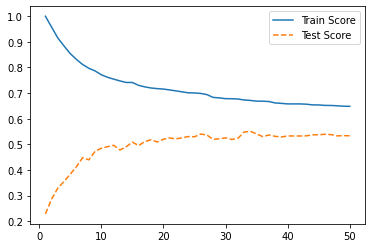

In [37]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

min_samples_leaf = 34

## min_samples_split

In [44]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(1, 20)]            # 참조: para_leaf : [1,2,3,…,19]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=42
                                 , min_samples_leaf=34, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.671,0.551
1,4,0.671,0.551
2,6,0.671,0.551
3,8,0.671,0.551
4,10,0.671,0.551
5,12,0.671,0.551
6,14,0.671,0.551
7,16,0.671,0.551
8,18,0.671,0.551
9,20,0.671,0.551


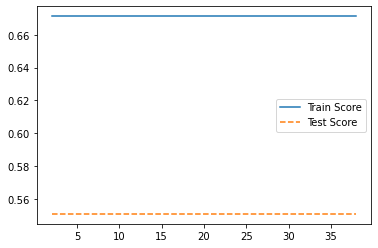

In [45]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

min_samples_split = 2

## max_depth

In [46]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_depth = [depth for depth in range(1, 21)]            # 참조: para_leaf : [1,2,3,…,19]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=34, min_samples_split=2, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["max_Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,max_Depth,TrainScore,TestScore
0,1,0.472,0.410
1,2,0.578,0.519
2,3,0.617,0.549
3,4,0.633,0.564
4,5,0.642,0.556
5,6,0.654,0.557
6,7,0.661,0.551
7,8,0.667,0.549
8,9,0.669,0.548
9,10,0.671,0.551


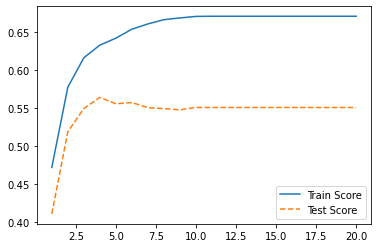

In [47]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

max_depth = 4

## 최종모델 선정

In [20]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 34, min_samples_split = 2, max_depth = 4, random_state=42)
tree_final.fit(df_train_x, df_train_y)
# train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.633
Score on test set: 0.564


In [49]:
v_feature_name = df_train_x.columns

In [51]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
20,TenureMonths,0.745
15,ChurnScore,0.151
24,MonthRoamCharge,0.058
10,OnlineSecurity,0.040
21,AvgCharge,0.006
0,Gender,0.000
14,AvgDownloadGB,0.000
23,TotalRevenue,0.000
22,TotalCharge,0.000
19,TotalRoamCharge,0.000


Text(0, 0.5, '설명변수')

C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50836 missing from c

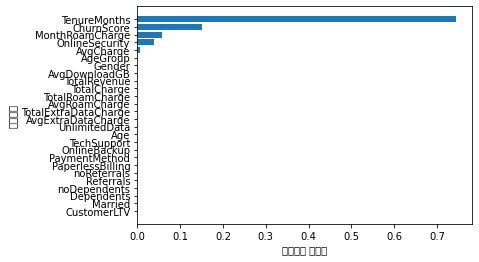

In [52]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# Random Forest

In [21]:
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz: 나무 구조 시각화 
import graphviz
# 데이터 분할
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

In [22]:
df_raw = pd.read_csv('DATA/add_variable_customer.csv', encoding='euc-kr', parse_dates=['EndDateTmp', 'StartDate'])
df_raw

,Unnamed: 0,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,0,C-10001,여성,37,30,Yes,No,0,Yes,2,...,3,0,47910,431100,21,83590.47619,1755400,2186500,20528,0
1,1,C-10002,남성,46,40,No,No,0,No,0,...,5,11300,12090,108710,21,68928.57143,1447500,1567510,5176,538
2,2,C-10003,남성,50,50,No,No,0,No,0,...,1,0,38080,152100,4,98180.00000,490900,643000,38025,0
3,3,C-10004,남성,78,70,Yes,No,0,Yes,1,...,1,0,31410,408720,13,112742.85710,1578400,1987120,31440,0
4,4,C-10005,여성,75,70,Yes,No,0,Yes,3,...,1,0,8360,24970,3,94500.00000,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6858,C-17039,여성,20,20,No,No,0,No,0,...,4,0,52770,685680,25,64428.00000,1610700,2296380,27427,0
6859,6859,C-17040,남성,40,40,Yes,No,0,Yes,1,...,1,0,18310,402730,22,101891.30430,2343500,2746230,18305,0
6860,6860,C-17041,남성,22,20,No,No,0,No,0,...,5,0,21020,42040,14,56600.00000,792400,834440,3002,0
6861,6861,C-17042,남성,21,20,No,No,0,Yes,5,...,3,0,2370,160460,79,80107.59494,6328500,6488960,2031,0


In [23]:
df_raw.drop(['Unnamed: 0', 'CustomerId'], axis = 1, inplace=True)

In [24]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

In [25]:
df_raw['StartDate'] = pd.to_datetime(df_raw['StartDate'])
df_raw = df_raw[(df_raw["StartDate"].dt.year>=2020)]

In [26]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop(['SatisScore', 'ChurnLabel', 'StartDate', 'EndDate', 'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=False)
df_raw_y = df_raw['SatisScore']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=42)

## Default Model

In [59]:
# 기본 모델생성
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.948
Score on test set: 0.586


## n_estimators

In [68]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(20, 35)]            

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=42)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,200,0.949,0.581
1,210,0.949,0.580
2,220,0.949,0.581
3,230,0.949,0.581
4,240,0.949,0.582
5,250,0.949,0.583
6,260,0.949,0.583
7,270,0.949,0.584
8,280,0.949,0.584
9,290,0.949,0.584


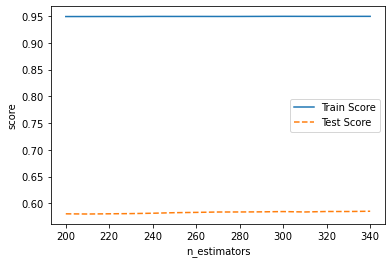

In [69]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

n_estimators = 300

## min_samples_leaf

In [70]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]         

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=42, n_estimators = 300
                                 , min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.949,0.585
1,2,0.925,0.588
2,3,0.897,0.591
3,4,0.871,0.591
4,5,0.848,0.593
5,6,0.828,0.592
6,7,0.811,0.590
7,8,0.796,0.589
8,9,0.783,0.589
9,10,0.772,0.589


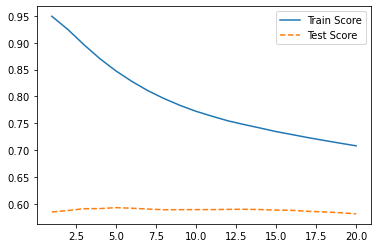

In [71]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

min_samples_leaf = 5

## min_samples_split

In [72]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_split: 분할하기 위한 노드의 최소 자료수
para_split = [n_split * 2 for n_split in range(1, 21)]           

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=42, n_estimators = 300
                                 , min_samples_leaf=5, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.848,0.593
1,4,0.848,0.593
2,6,0.848,0.593
3,8,0.848,0.593
4,10,0.848,0.593
5,12,0.838,0.593
6,14,0.827,0.593
7,16,0.817,0.592
8,18,0.808,0.592
9,20,0.800,0.592


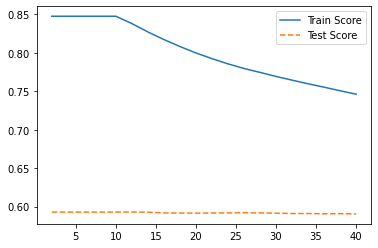

In [74]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

min_samplit_split = 14

## max_depth

In [75]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 21)]            

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=42, n_estimators = 300, min_samples_leaf = 5, min_samples_split = 14,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.472,0.411
1,2,0.585,0.526
2,3,0.629,0.567
3,4,0.655,0.586
4,5,0.671,0.591
5,6,0.690,0.595
6,7,0.713,0.598
7,8,0.737,0.598
8,9,0.758,0.598
9,10,0.776,0.597


In [ ]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

max_depth = 7

## 최종모델 선정

In [27]:
rf_final = RandomForestRegressor(n_estimators = 300, min_samples_leaf = 5, min_samples_split = 14, max_depth = 7, random_state=42)
rf_final.fit(df_train_x, df_train_y);
# train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.713
Score on test set: 0.598


In [78]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
20,TenureMonths,0.745
15,ChurnScore,0.151
24,MonthRoamCharge,0.058
10,OnlineSecurity,0.040
21,AvgCharge,0.006
0,Gender,0.000
14,AvgDownloadGB,0.000
23,TotalRevenue,0.000
22,TotalCharge,0.000
19,TotalRoamCharge,0.000


Text(0, 0.5, '변수')

C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48320 missing from c

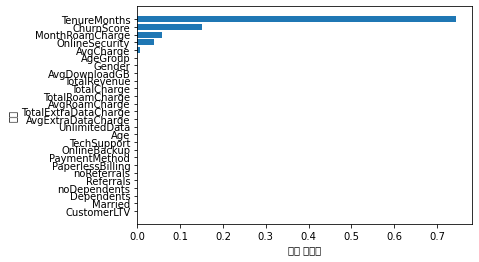

In [79]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Gradient Boosting

In [15]:
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz: 나무 구조 시각화 
import graphviz
# 데이터 분할
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

In [29]:
df_raw = pd.read_csv('DATA/add_variable_customer.csv', encoding='euc-kr', parse_dates=['EndDateTmp', 'StartDate'])
df_raw

,Unnamed: 0,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,0,C-10001,여성,37,30,Yes,No,0,Yes,2,...,3,0,47910,431100,21,83590.47619,1755400,2186500,20528,0
1,1,C-10002,남성,46,40,No,No,0,No,0,...,5,11300,12090,108710,21,68928.57143,1447500,1567510,5176,538
2,2,C-10003,남성,50,50,No,No,0,No,0,...,1,0,38080,152100,4,98180.00000,490900,643000,38025,0
3,3,C-10004,남성,78,70,Yes,No,0,Yes,1,...,1,0,31410,408720,13,112742.85710,1578400,1987120,31440,0
4,4,C-10005,여성,75,70,Yes,No,0,Yes,3,...,1,0,8360,24970,3,94500.00000,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6858,C-17039,여성,20,20,No,No,0,No,0,...,4,0,52770,685680,25,64428.00000,1610700,2296380,27427,0
6859,6859,C-17040,남성,40,40,Yes,No,0,Yes,1,...,1,0,18310,402730,22,101891.30430,2343500,2746230,18305,0
6860,6860,C-17041,남성,22,20,No,No,0,No,0,...,5,0,21020,42040,14,56600.00000,792400,834440,3002,0
6861,6861,C-17042,남성,21,20,No,No,0,Yes,5,...,3,0,2370,160460,79,80107.59494,6328500,6488960,2031,0


In [30]:
df_raw.drop(['Unnamed: 0', 'CustomerId'], axis = 1, inplace=True)

In [31]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

In [32]:
df_raw['StartDate'] = pd.to_datetime(df_raw['StartDate'])
df_raw = df_raw[(df_raw["StartDate"].dt.year>=2020)]

In [33]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop(['SatisScore', 'ChurnLabel', 'StartDate', 'EndDate', 'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=False)
df_raw_y = df_raw['SatisScore']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=42)

## Default Model

In [16]:
# 기본 모델생성
gb_uncustomized = GradientBoostingRegressor(random_state=42)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.678
Score on test set: 0.479


## n_estimators

In [17]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]            

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=42)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.491,0.459
1,20,0.560,0.499
2,30,0.587,0.496
3,40,0.606,0.495
4,50,0.619,0.493
5,60,0.632,0.489
6,70,0.644,0.488
7,80,0.656,0.485
8,90,0.668,0.480
9,100,0.678,0.479


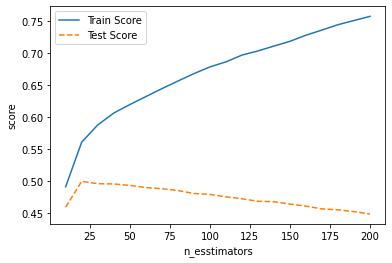

In [19]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_esstimators")
plt.legend()

In [20]:
n_estimators = 200

## min_samples_leaf

In [23]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 31)]         

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=42, n_estimators = n_estimators, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf['diff'] = df_score_leaf["TrainScore"] - df_score_leaf["TestScore"] 
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore,diff
0,1,0.757,0.448,0.309
1,2,0.755,0.456,0.298
2,3,0.758,0.447,0.311
3,4,0.751,0.458,0.293
4,5,0.745,0.456,0.288
5,6,0.742,0.463,0.280
6,7,0.743,0.461,0.282
7,8,0.740,0.465,0.275
8,9,0.736,0.457,0.279
9,10,0.737,0.461,0.276


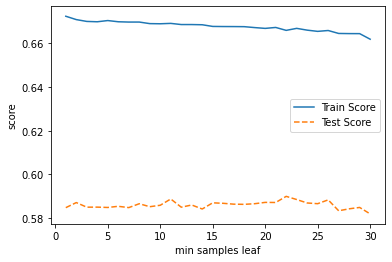

In [97]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [24]:
min_samples_leaf = 22

## min_samples_split

In [25]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_split: 분할하기 위한 노드의 최소 자료수
para_split = [n_split * 2 for n_split in range(1, 21)]           

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=42, n_estimators = n_estimators, min_samples_leaf=min_samples_leaf, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.719,0.458
1,4,0.719,0.458
2,6,0.719,0.458
3,8,0.719,0.458
4,10,0.719,0.458
5,12,0.719,0.458
6,14,0.719,0.458
7,16,0.719,0.458
8,18,0.719,0.458
9,20,0.719,0.458


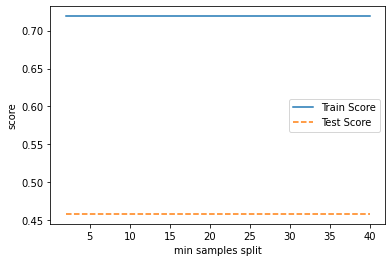

In [26]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [27]:
min_samples_split = 2

## max_depth

In [33]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]            

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=42, n_estimators = n_estimators,
                               min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.544,0.457
1,2,0.645,0.471
2,3,0.719,0.458
3,4,0.780,0.444
4,5,0.826,0.431
5,6,0.869,0.416
6,7,0.892,0.408
7,8,0.909,0.408
8,9,0.931,0.389
9,10,0.943,0.384


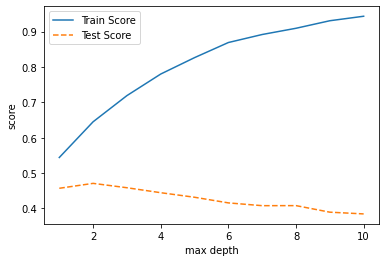

In [34]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
\
plt.legend()

In [35]:
max_depth = 8

## learning_rate

In [38]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# learning rate
para_lr = [lr * 0.001 for lr in range(60, 100)]            

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=42, n_estimators = n_estimators, min_samples_leaf=min_samples_leaf,
                                   min_samples_split=min_samples_split, max_depth = max_depth, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr['diff'] =df_score_lr["TrainScore"] - df_score_lr["TestScore"]
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore,diff
0,0.060,0.867,0.418,0.448
1,0.061,0.859,0.429,0.430
2,0.062,0.868,0.422,0.446
3,0.063,0.867,0.420,0.447
4,0.064,0.864,0.423,0.441
5,0.065,0.873,0.411,0.461
6,0.066,0.875,0.424,0.451
7,0.067,0.869,0.416,0.453
8,0.068,0.873,0.418,0.455
9,0.069,0.873,0.412,0.460


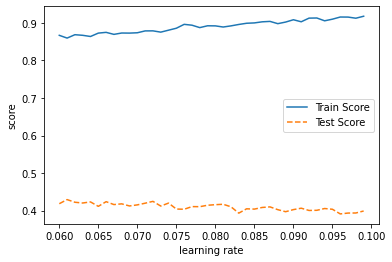

In [37]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [40]:
learning_rate = 0.074

## 최종모델 생성

In [44]:
gb_final = GradientBoostingRegressor(n_estimators = 200, min_samples_leaf = 22, min_samples_split = 2,
                                     max_depth = 8, learning_rate = 0.074, random_state=42)
gb_final.fit(df_train_x, df_train_y);
# train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.880
Score on test set: 0.420


In [42]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
20,TenureMonths,0.505
16,SatisScore,0.135
15,CustomerLTV,0.055
18,AvgRoamCharge,0.044
21,AvgCharge,0.041
22,TotalCharge,0.038
19,TotalRoamCharge,0.037
24,MonthRoamCharge,0.032
1,Age,0.031
23,TotalRevenue,0.026


Text(0, 0.5, '변수')

/Users/jay/.pyenv/versions/3.9.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jay/.pyenv/versions/3.9.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jay/.pyenv/versions/3.9.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jay/.pyenv/versions/3.9.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jay/.pyenv/versions/3.9.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) miss

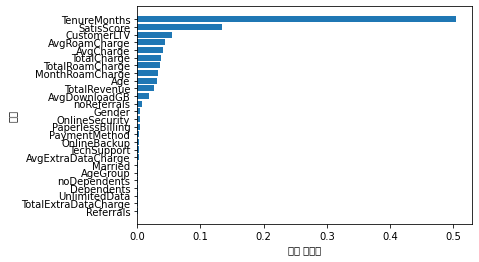

In [43]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# XGBoosting

In [35]:
# xgboost 패키지 불러오기 
from xgboost import XGBRegressor # 회귀트리 모델
# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 평가 함수
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))


## Default Model

In [120]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncustomized = XGBRegressor(random_state=42)
xgboost_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(xgboost_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(xgboost_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.994
Score on test set: 0.523


## n_estimators

In [121]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]            

for v_n_estimators in para_n_tree:
    xg = XGBRegressor(n_estimators=v_n_estimators, random_state=42)
    xg.fit(df_train_x, df_train_y)
    train_score.append(xg.score(df_train_x, df_train_y))
    test_score.append(xg.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.797,0.578
1,20,0.881,0.572
2,30,0.918,0.561
3,40,0.946,0.555
4,50,0.962,0.545
5,60,0.973,0.534
6,70,0.983,0.532
7,80,0.988,0.531
8,90,0.991,0.528
9,100,0.994,0.523


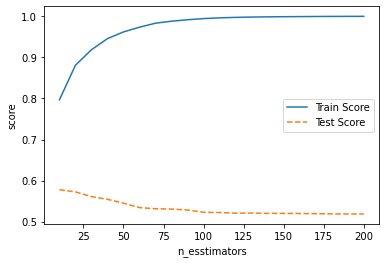

In [122]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_esstimators")
plt.legend()

n_estimators = 10

## min_samples_leaf

In [123]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 31)]         

for v_min_samples_leaf in para_leaf:
    xg = XGBRegressor(random_state=42, n_estimators = 10, min_samples_leaf=v_min_samples_leaf)
    xg.fit(df_train_x, df_train_y)
    train_score.append(xg.score(df_train_x, df_train_y))
    test_score.append(xg.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

[03:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be 

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.797,0.578
1,2,0.797,0.578
2,3,0.797,0.578
3,4,0.797,0.578
4,5,0.797,0.578
5,6,0.797,0.578
6,7,0.797,0.578
7,8,0.797,0.578
8,9,0.797,0.578
9,10,0.797,0.578


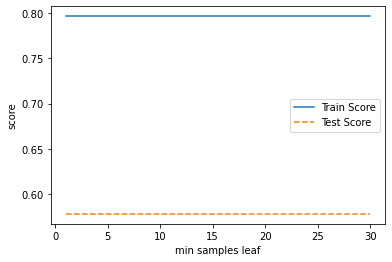

In [124]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

min_samples_leaf x

## min_saples_split

In [125]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_split: 분할하기 위한 노드의 최소 자료수
para_split = [n_split * 2 for n_split in range(1, 21)]           

for v_min_samples_split in para_split:
    xg = XGBRegressor(random_state=42, n_estimators = 10, min_samples_split=v_min_samples_split)
    xg.fit(df_train_x, df_train_y)
    train_score.append(xg.score(df_train_x, df_train_y))
    test_score.append(xg.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

[03:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not 

,MinSamplesSplit,TrainScore,TestScore
0,2,0.797,0.578
1,4,0.797,0.578
2,6,0.797,0.578
3,8,0.797,0.578
4,10,0.797,0.578
5,12,0.797,0.578
6,14,0.797,0.578
7,16,0.797,0.578
8,18,0.797,0.578
9,20,0.797,0.578


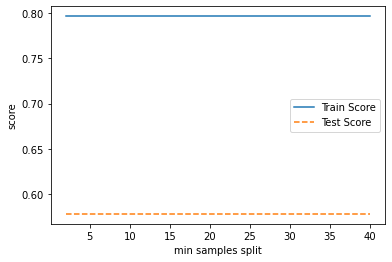

In [126]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

min_samples_split x

## max_depth

In [127]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]            

for v_max_depth in para_depth:
    xg = XGBRegressor(random_state=42, n_estimators = 10, max_depth = v_max_depth)
    xg.fit(df_train_x, df_train_y)
    train_score.append(xg.score(df_train_x, df_train_y))
    test_score.append(xg.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.555,0.503
1,2,0.632,0.565
2,3,0.670,0.587
3,4,0.709,0.589
4,5,0.747,0.588
5,6,0.797,0.578
6,7,0.839,0.564
7,8,0.872,0.565
8,9,0.909,0.553
9,10,0.935,0.543


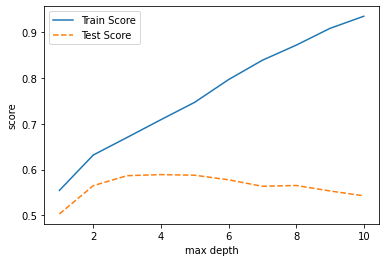

In [128]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

max_depth = 4

## learning_rate

In [136]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# learning rate
para_lr = [lr * 0.001 for lr in range(280, 320)]            

for v_learning_rate in para_lr:
    xg = XGBRegressor(random_state=42, n_estimators = 10, max_depth = 4, learning_rate = v_learning_rate)
    xg.fit(df_train_x, df_train_y)
    train_score.append(xg.score(df_train_x, df_train_y))
    test_score.append(xg.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.280,0.704,0.593
1,0.281,0.703,0.592
2,0.282,0.703,0.592
3,0.283,0.704,0.594
4,0.284,0.705,0.592
5,0.285,0.704,0.590
6,0.286,0.705,0.590
7,0.287,0.706,0.587
8,0.288,0.702,0.590
9,0.289,0.702,0.594


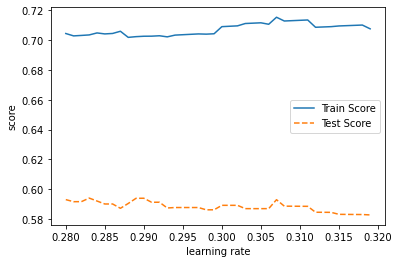

In [137]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

learning rate = 0.289

## 최종모델 생성

In [36]:
xg_final = XGBRegressor(random_state=42, n_estimators = 10, max_depth = 4, learning_rate = 0.289)
xg_final.fit(df_train_x, df_train_y);
# train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.697
Score on test set: 0.597


In [168]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = xg_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
20,TenureMonths,0.626
15,ChurnScore,0.120
24,MonthRoamCharge,0.066
10,OnlineSecurity,0.040
23,TotalRevenue,0.018
13,UnlimitedData,0.017
4,Dependents,0.013
8,PaperlessBilling,0.011
21,AvgCharge,0.011
18,AvgRoamCharge,0.011


Text(0, 0.5, '변수')

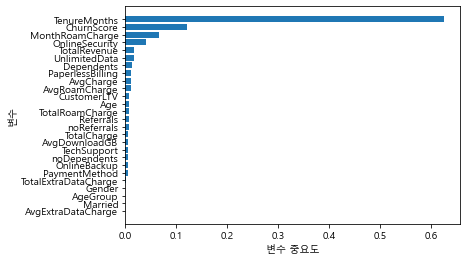

In [169]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 모델평가

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [37]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [17]:
df_raw = pd.read_csv('DATA/add_variable_customer.csv', encoding='euc-kr', parse_dates=['EndDateTmp', 'StartDate'])
df_raw

,Unnamed: 0,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,0,C-10001,여성,37,30,Yes,No,0,Yes,2,...,3,0,47910,431100,21,83590.47619,1755400,2186500,20528,0
1,1,C-10002,남성,46,40,No,No,0,No,0,...,5,11300,12090,108710,21,68928.57143,1447500,1567510,5176,538
2,2,C-10003,남성,50,50,No,No,0,No,0,...,1,0,38080,152100,4,98180.00000,490900,643000,38025,0
3,3,C-10004,남성,78,70,Yes,No,0,Yes,1,...,1,0,31410,408720,13,112742.85710,1578400,1987120,31440,0
4,4,C-10005,여성,75,70,Yes,No,0,Yes,3,...,1,0,8360,24970,3,94500.00000,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6858,C-17039,여성,20,20,No,No,0,No,0,...,4,0,52770,685680,25,64428.00000,1610700,2296380,27427,0
6859,6859,C-17040,남성,40,40,Yes,No,0,Yes,1,...,1,0,18310,402730,22,101891.30430,2343500,2746230,18305,0
6860,6860,C-17041,남성,22,20,No,No,0,No,0,...,5,0,21020,42040,14,56600.00000,792400,834440,3002,0
6861,6861,C-17042,남성,21,20,No,No,0,Yes,5,...,3,0,2370,160460,79,80107.59494,6328500,6488960,2031,0


In [18]:
df_raw.drop(['Unnamed: 0', 'CustomerId'], axis = 1, inplace=True)

In [19]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

In [20]:
df_raw['StartDate'] = pd.to_datetime(df_raw['StartDate'])
df_raw = df_raw[(df_raw["StartDate"].dt.year>=2020)]

In [21]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop(['SatisScore', 'ChurnLabel', 'StartDate', 'EndDate', 'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=False)
df_raw_y = df_raw['SatisScore']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=42)

In [22]:
# train/test data 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 42) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (1516, 33)
test data size : (650, 33)


In [23]:
reg_ss_model = smf.ols(formula = "SatisScore ~ Married + TotalRoamCharge " , data = ss_df_train)
reg_ss_result = reg_ss_model.fit()
print(reg_ss_result.summary())

tree_final = DecisionTreeRegressor(min_samples_leaf = 34, min_samples_split = 2, max_depth = 4, random_state=42)
tree_final.fit(df_train_x, df_train_y)

rf_final = RandomForestRegressor(n_estimators = 300, min_samples_leaf = 5, min_samples_split = 14, max_depth = 7, random_state=42)
rf_final.fit(df_train_x, df_train_y);

gb_final = GradientBoostingRegressor(n_estimators = 30, min_samples_leaf = 22, min_samples_split = 2,
                                     max_depth = 5, learning_rate = 0.081, random_state=42)
gb_final.fit(df_train_x, df_train_y);

xg_final = XGBRegressor(random_state=42, n_estimators = 10, max_depth = 4, learning_rate = 0.289)
xg_final.fit(df_train_x, df_train_y);

                            OLS Regression Results                            
Dep. Variable:             SatisScore   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.577
Date:                Thu, 17 Mar 2022   Prob (F-statistic):             0.0287
Time:                        05:02:51   Log-Likelihood:                -803.18
No. Observations:                 478   AIC:                             1612.
Df Residuals:                     475   BIC:                             1625.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9116      0.082     

In [38]:
models = ["다중선형회귀", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅", "XGBoosting"]
mse, rmse, mae, mape = [],[],[],[]

In [39]:
# 예측
lr_y_pred = reg_ss_result.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

NameError: name 'mean_squared_error' is not defined

In [40]:
# 예측
dt_y_pred = tree_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

NameError: name 'mean_squared_error' is not defined

In [41]:
# 예측
rf_y_pred = rf_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

NameError: name 'mean_squared_error' is not defined

In [28]:
gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [29]:
# 예측
xg_y_pred = xg_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, xg_y_pred))
rmse.append(root_mean_squared_error(df_test_y, xg_y_pred))
mae.append(mean_absolute_error(df_test_y, xg_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, xg_y_pred))

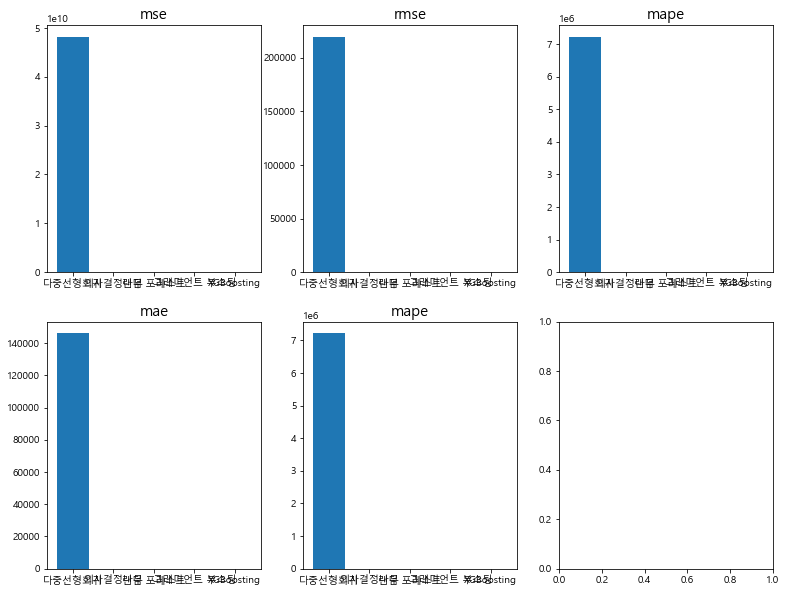

In [30]:
fig, ax = plt.subplots(2,3, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[0, 2].bar(models, mape)
ax[0, 2].set_title("mape").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)
